In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
import numpy as np


In [3]:
df=pd.read_csv("sindummieslimpioprimera.csv")
df.columns

Index(['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_bilingue',
       'cole_calendario', 'cole_caracter', 'departamento', 'cole_genero',
       'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza',
       'cole_nombre_establecimiento', 'estu_estudiante',
       'estu_fechanacimiento', 'estu_genero', 'estu_nacionalidad',
       'estu_privado_libertad', 'fami_cuartoshogar', 'fami_educacionmadre',
       'fami_educacionpadre', 'fami_estratovivienda', 'fami_personashogar',
       'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet',
       'fami_tienelavadora', 'punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
       'punt_global'],
      dtype='object')

Estadisticas descriptivas

In [5]:
# Seleccionar las columnas de puntajes relevantes
puntajes_columns = [
    'punt_global', 'punt_matematicas', 'punt_lectura_critica',
    'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_ingles'
]

# Calcular las estadísticas descriptivas
descriptive_stats = df[puntajes_columns].describe()
descriptive_stats

,punt_global,punt_matematicas,punt_lectura_critica,punt_sociales_ciudadanas,punt_c_naturales,punt_ingles
count,77508.000000,77508.000000,77508.000000,77508.000000,77508.000000,77508.000000
mean,242.947773,48.638747,50.093655,47.121265,48.711630,47.970222
std,45.879141,11.134687,9.790008,10.933578,9.893318,10.962903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,209.000000,41.000000,43.000000,39.000000,42.000000,41.000000
50%,238.000000,48.000000,50.000000,47.000000,48.000000,47.000000
75%,272.000000,56.000000,57.000000,55.000000,55.000000,53.000000
max,465.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Crear un histograma para el puntaje global

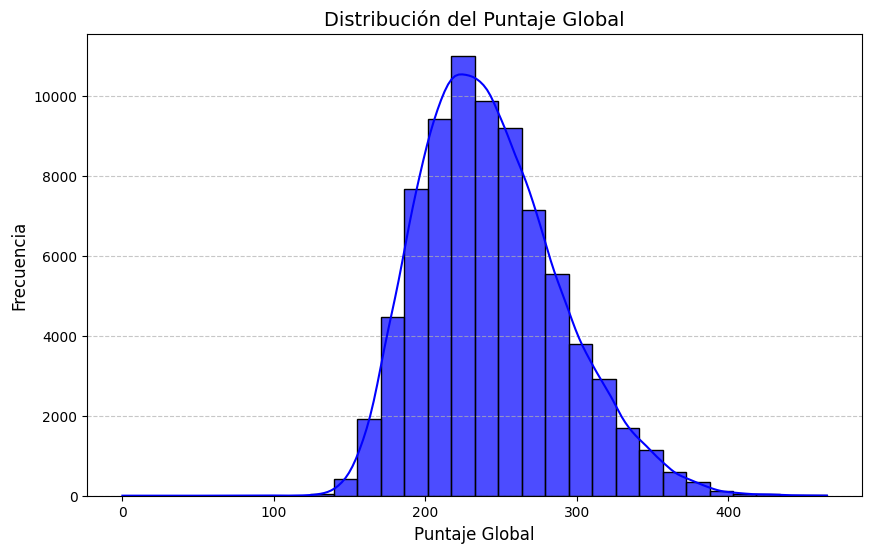

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['punt_global'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribución del Puntaje Global', fontsize=14)
plt.xlabel('Puntaje Global', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Crear un diagrama de caja para los puntajes por área

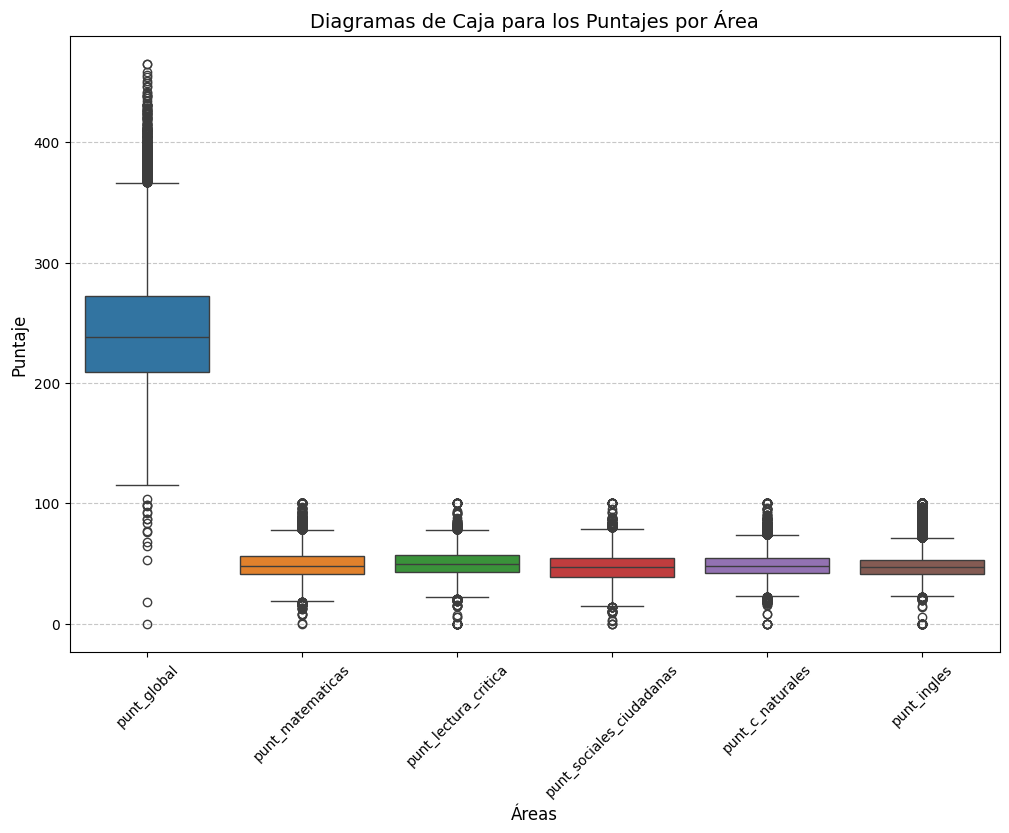

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['punt_global', 'punt_matematicas', 'punt_lectura_critica',
                     'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_ingles']])
plt.title('Diagramas de Caja para los Puntajes por Área', fontsize=14)
plt.xlabel('Áreas', fontsize=12)
plt.ylabel('Puntaje', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Relación entre area con puntaje 

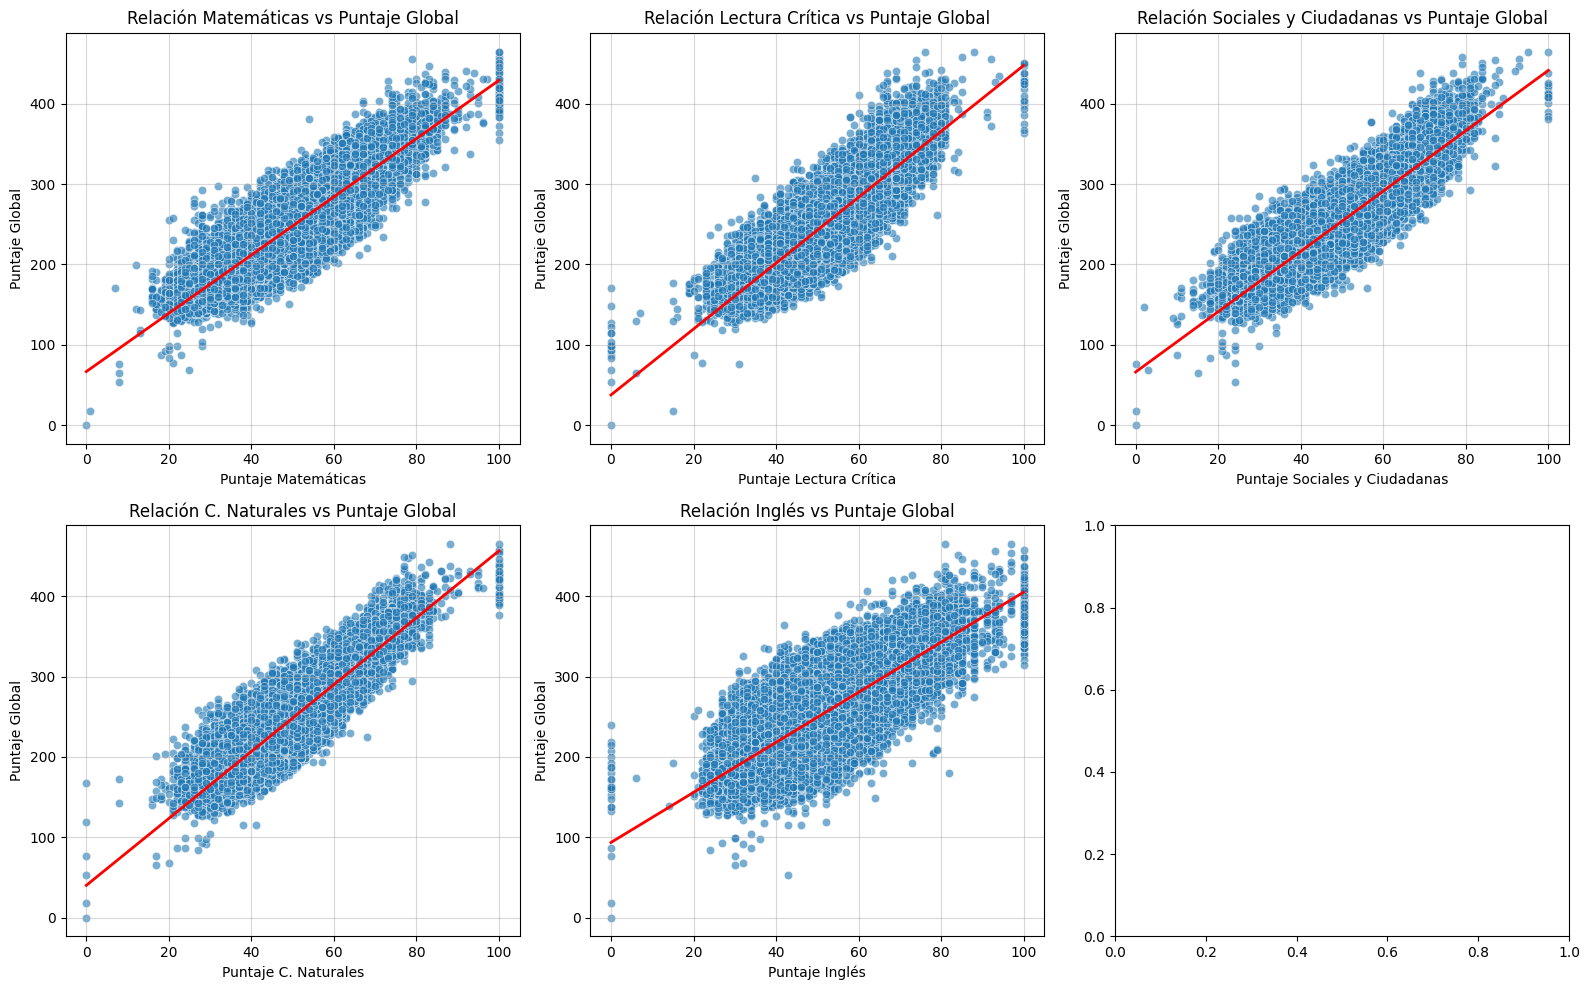

In [11]:
# Configurar el tamaño de la figura y la distribución de los subgráficos
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Listar las áreas para iterar
areas = ['punt_matematicas', 'punt_lectura_critica', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_ingles']
titles = ['Matemáticas', 'Lectura Crítica', 'Sociales y Ciudadanas', 'C. Naturales', 'Inglés']

# Crear un scatterplot con línea de tendencia para cada área
for i, area in enumerate(areas):
    sns.scatterplot(ax=axes[i], x=df[area], y=df['punt_global'], alpha=0.6)
    sns.regplot(ax=axes[i], x=df[area], y=df['punt_global'], scatter=False, color='red', ci=None, line_kws={"linewidth": 2})
    axes[i].set_title(f'Relación {titles[i]} vs Puntaje Global', fontsize=12)
    axes[i].set_xlabel(f'Puntaje {titles[i]}', fontsize=10)
    axes[i].set_ylabel('Puntaje Global', fontsize=10)
    axes[i].grid(alpha=0.5)

# Ajustar los espacios entre los gráficos
plt.tight_layout()
plt.show()




C:\Users\user\AppData\Local\Temp\ipykernel_6276\3302426691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cole_bilingue', y='punt_global', data=df, palette='Set2')


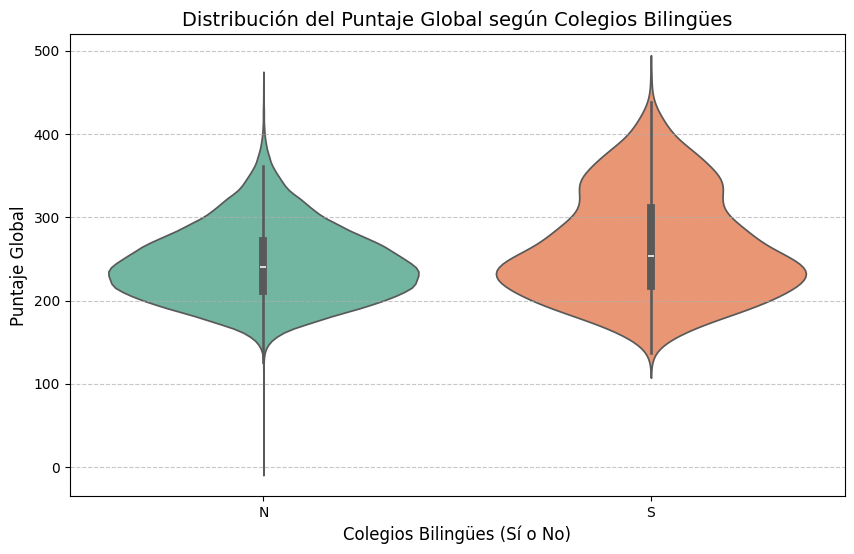

In [12]:
# Crear un diagrama de violín para puntaje global según si el colegio es bilingüe
plt.figure(figsize=(10, 6))
sns.violinplot(x='cole_bilingue', y='punt_global', data=df, palette='Set2')
plt.title('Distribución del Puntaje Global según Colegios Bilingües', fontsize=14)
plt.xlabel('Colegios Bilingües (Sí o No)', fontsize=12)
plt.ylabel('Puntaje Global', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6276\2335491619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cole_area_ubicacion', y='punt_global', data=df, palette='Pastel1')


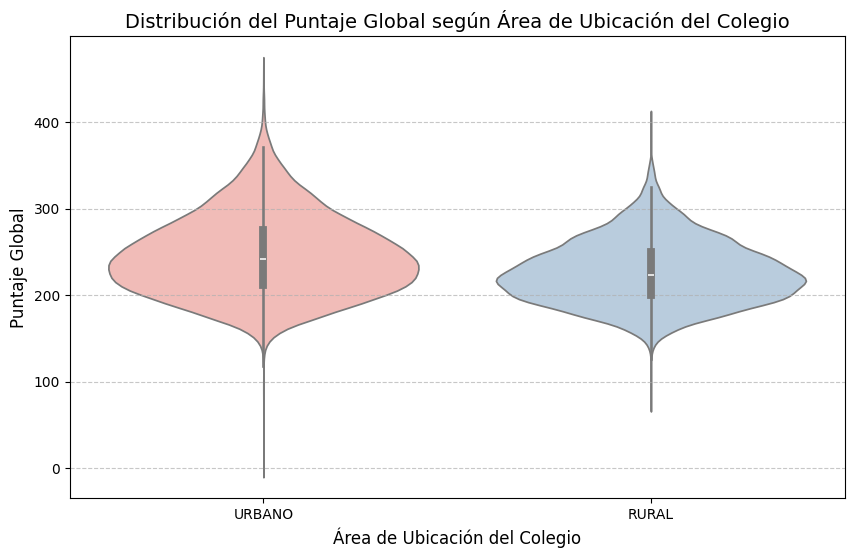

In [13]:
# Crear un diagrama de violín para puntaje global según el área de ubicación del colegio
plt.figure(figsize=(10, 6))
sns.violinplot(x='cole_area_ubicacion', y='punt_global', data=df, palette='Pastel1')
plt.title('Distribución del Puntaje Global según Área de Ubicación del Colegio', fontsize=14)
plt.xlabel('Área de Ubicación del Colegio', fontsize=12)
plt.ylabel('Puntaje Global', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6276\2887214623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['alto_desempeno'] = df_filtered['punt_global'] > 300


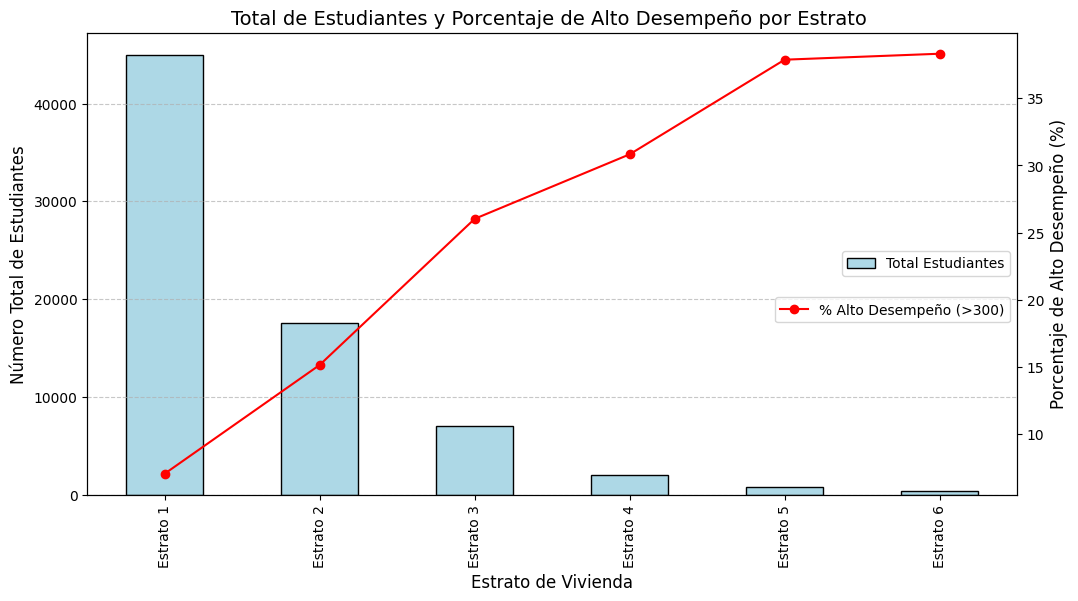

In [30]:
# Filtrar los datos para excluir "Sin Estrato"
df_filtered = df[df['fami_estratovivienda'] != 'Sin Estrato']

# Recalcular el porcentaje de estudiantes con puntaje global > 300 por estrato
df_filtered['alto_desempeno'] = df_filtered['punt_global'] > 300
proporciones = df_filtered.groupby('fami_estratovivienda')['alto_desempeno'].mean() * 100

# Recalcular el número total de estudiantes por estrato
estrato_counts = df_filtered['fami_estratovivienda'].value_counts()

# Crear el gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras: Número total de estudiantes por estrato
estrato_counts.sort_index().plot(kind='bar', ax=ax1, color='lightblue', edgecolor='black', label='Total Estudiantes')
ax1.set_title('Total de Estudiantes y Porcentaje de Alto Desempeño por Estrato ', fontsize=14)
ax1.set_xlabel('Estrato de Vivienda', fontsize=12)
ax1.set_ylabel('Número Total de Estudiantes', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Línea: Porcentaje de estudiantes con alto desempeño
ax2 = ax1.twinx()
proporciones.sort_index().plot(kind='line', ax=ax2, color='red', marker='o', label='% Alto Desempeño (>300)')
ax2.set_ylabel('Porcentaje de Alto Desempeño (%)', fontsize=12)

# Leyendas y ajustes
ax1.legend(loc='center right', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center right', bbox_to_anchor=(1, 0.4))
plt.show()


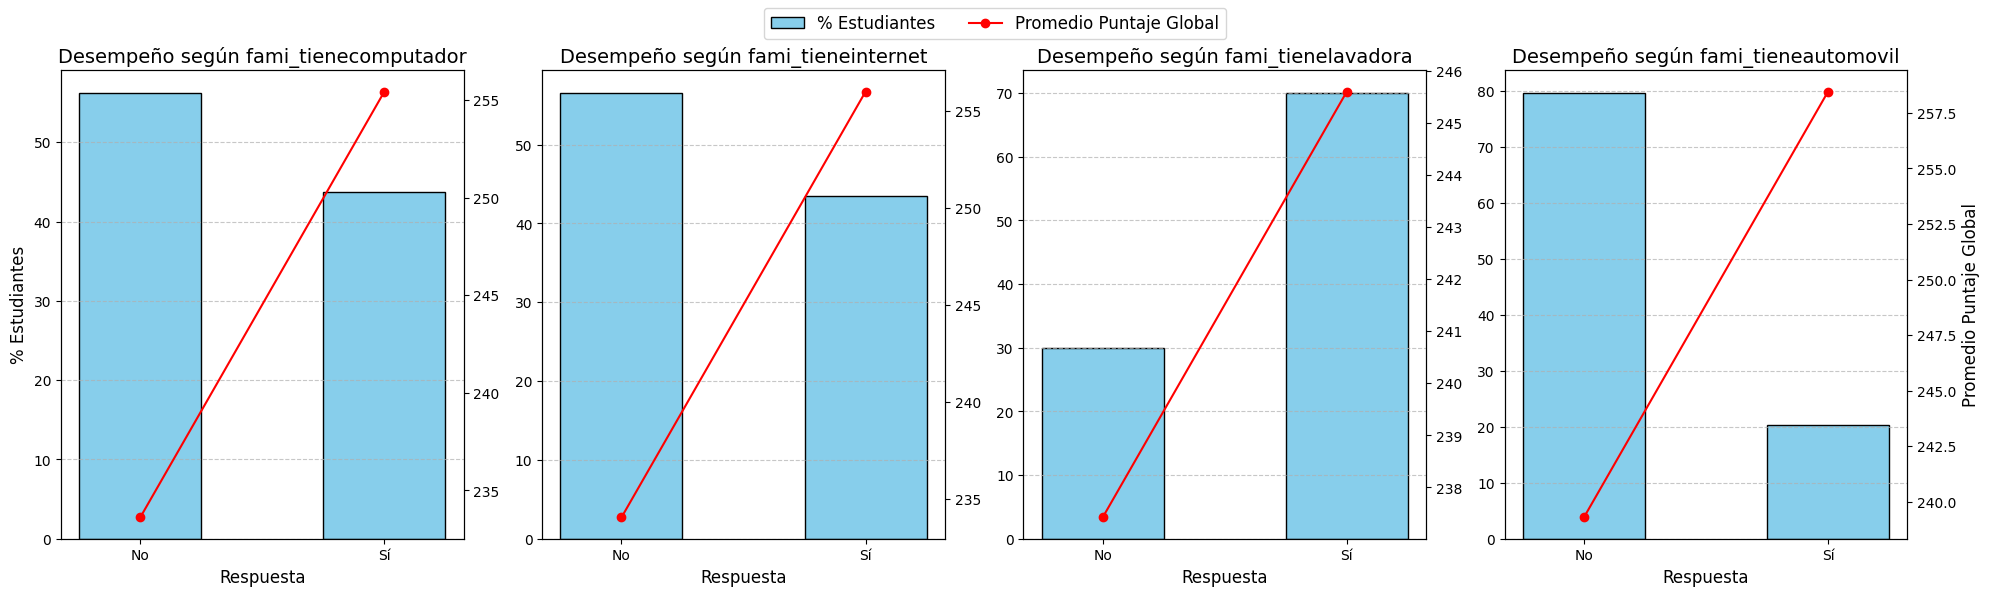

In [57]:
# Variables de interés
variables_familia = [
    'fami_tienecomputador', 'fami_tieneinternet', 
    'fami_tienelavadora', 'fami_tieneautomovil'
]

# Crear subgráficos dinámicamente
fig, axes = plt.subplots(1, len(variables_familia), figsize=(20, 6), sharey=False)

# Crear listas para los manejadores de las barras y líneas
bar_handles = []
line_handles = []

for i, var in enumerate(variables_familia):
    # Calcular porcentaje de estudiantes con propiedad familiar
    porcentaje_propiedad = df[var].value_counts(normalize=True) * 100

    # Calcular promedio de puntaje global según propiedad
    promedio_puntaje = df.groupby(var)['punt_global'].mean()

    # Crear barras para el porcentaje
    x = np.arange(len(porcentaje_propiedad))  # Posiciones para las categorías
    ancho = 0.5  # Ancho de las barras

    bars = axes[i].bar(
        x, 
        porcentaje_propiedad.sort_index(), 
        color='skyblue', 
        edgecolor='black', 
        label='% Estudiantes', 
        width=ancho
    )
    axes[i].set_title(f'Desempeño según {var}', fontsize=14)
    axes[i].set_xlabel('Respuesta', fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(['No', 'Sí'])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Configurar el eje izquierdo solo para el primer gráfico
    if i == 0:
        axes[i].set_ylabel('% Estudiantes', fontsize=12)

    # Agregar puntos para el promedio en el eje secundario
    ax2 = axes[i].twinx()
    line, = ax2.plot(
        x, 
        promedio_puntaje.sort_index(), 
        color='red', 
        marker='o', 
        label='Promedio Puntaje Global'
    )

    # Configurar el eje derecho solo para el último gráfico
    if i == len(variables_familia) - 1:
        ax2.set_ylabel('Promedio Puntaje Global', fontsize=12)

    # Guardar los manejadores de barras y líneas
    if not bar_handles:
        bar_handles.append(bars[0])
    if not line_handles:
        line_handles.append(line)

# Agregar una única leyenda global
fig.legend(
    handles=[bar_handles[0], line_handles[0]], 
    labels=['% Estudiantes', 'Promedio Puntaje Global'], 
    loc='upper center', 
    ncol=2, 
    fontsize=12
)

# Ajustar el diseño general
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reservar espacio para la leyenda global
plt.show()




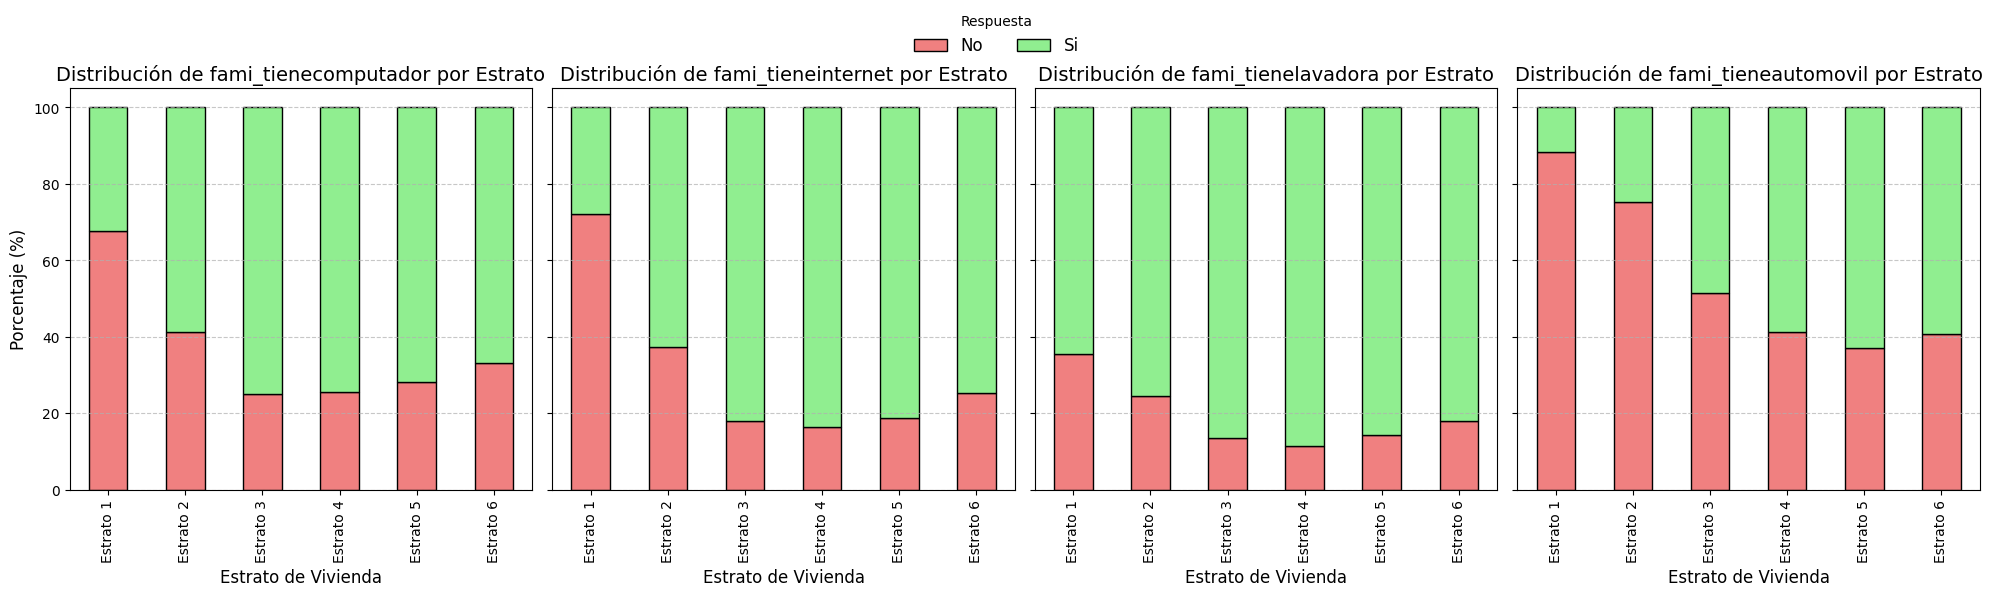

In [58]:
# Variables de interés
variables_familia = [
    'fami_tienecomputador', 'fami_tieneinternet', 
    'fami_tienelavadora', 'fami_tieneautomovil'
]

# Filtrar los datos para eliminar "Sin Estrato"
df_filtered = df[df['fami_estratovivienda'] != 'Sin Estrato']

# Crear una figura para los subgráficos
fig, axes = plt.subplots(1, len(variables_familia), figsize=(20, 6), sharey=True)

# Colores para las respuestas
colores = ['lightcoral', 'lightgreen']

for i, var in enumerate(variables_familia):
    # Calcular la distribución porcentual de respuestas por estrato
    distribucion = (
        df_filtered.groupby('fami_estratovivienda')[var]
        .value_counts(normalize=True)
        .unstack()
        .fillna(0) * 100
    )

    # Crear el gráfico de barras apiladas normalizadas
    distribucion[['No', 'Si']].plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        color=colores,
        edgecolor='black'
    )

    # Configuración del gráfico
    axes[i].set_title(f'Distribución de {var} por Estrato', fontsize=14)
    axes[i].set_xlabel('Estrato de Vivienda', fontsize=12)
    if i == 0:
        axes[i].set_ylabel('Porcentaje (%)', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Quitar leyenda de cada gráfico individual
    axes[i].get_legend().remove()

# Agregar una leyenda global con estilo de línea
fig.legend(
    ['No', 'Si'], 
    loc='upper center', 
    ncol=2, 
    fontsize=12, 
    title='Respuesta', 
    frameon=False  # Eliminar el cuadro alrededor de la leyenda
)

# Ajustar el diseño general
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Reservar espacio para la leyenda global
plt.show()
